In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize


ModuleNotFoundError: No module named 'lightgbm'

ТУТ я взял данные и смотрю что мне они покажут 

In [45]:
df1 = pd.read_csv("../AC/trein.csv")
df2 = pd.read_csv("../AC/val.csv")

In [46]:
X_train = df1.drop('target', axis=1)
y_train = df1['target']
X_test = df2.drop('target', axis=1)
y_test = df2['target']

In [47]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

С неплохи результатом



Logistic Regression
Accuracy: 0.9739
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3576
           1       0.03      0.02      0.02        66

    accuracy                           0.97      3642
   macro avg       0.51      0.50      0.50      3642
weighted avg       0.96      0.97      0.97      3642



c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


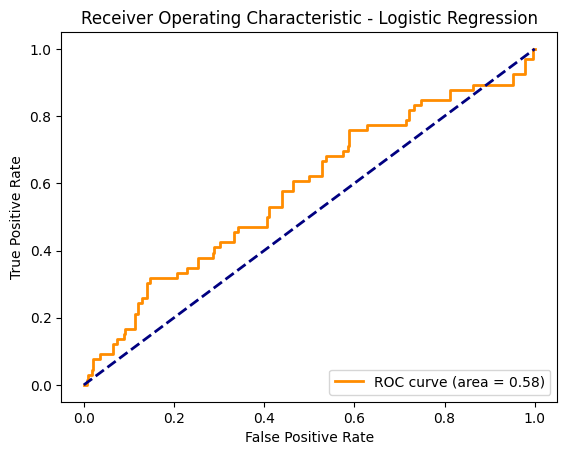

In [48]:
log_reg = LogisticRegression(random_state=42, max_iter=100000)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")


Random Forest
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.17      0.02      0.03        66

    accuracy                           0.98      3642
   macro avg       0.57      0.51      0.51      3642
weighted avg       0.97      0.98      0.97      3642



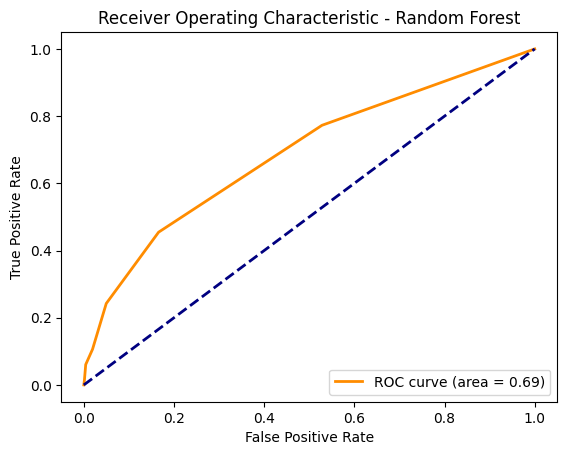

In [49]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=10)
random_forest.fit(X_train, y_train)
evaluate_model(random_forest, X_test, y_test, "Random Forest")

[LightGBM] [Info] Number of positive: 149, number of negative: 4668
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22084
[LightGBM] [Info] Number of data points in the train set: 4817, number of used features: 230
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030932 -> initscore=-3.444540
[LightGBM] [Info] Start training from score -3.444540

LightGBM
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.33      0.06      0.10        66

    accuracy                           0.98      3642
   macro avg       0.66      0.53      0.55      3642
weighted avg       0.97      0.98      0.97      3642



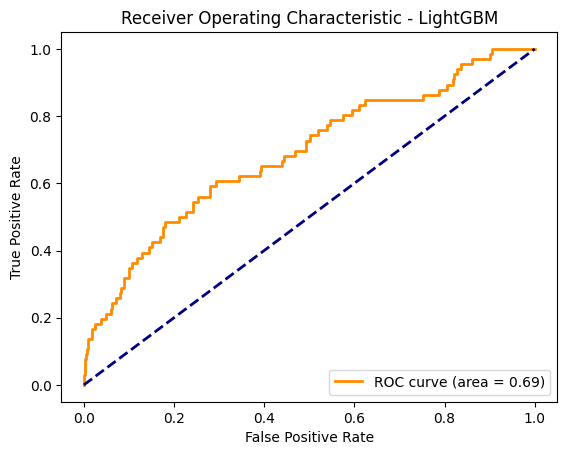

In [50]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test, "LightGBM")

c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:40:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.9583
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3576
           1       0.08      0.12      0.10        66

    accuracy                           0.96      3642
   macro avg       0.53      0.55      0.54      3642
weighted avg       0.97      0.96      0.96      3642



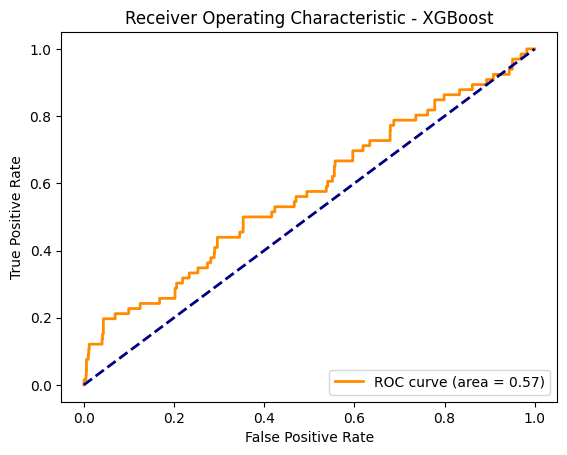

In [72]:
xgboost = XGBClassifier(random_state=50, use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
evaluate_model(xgboost, X_test, y_test, "XGBoost") # ну норм

С результатом похуже


Decision Tree
Accuracy: 0.8229
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      3576
           1       0.02      0.20      0.04        66

    accuracy                           0.82      3642
   macro avg       0.50      0.52      0.47      3642
weighted avg       0.97      0.82      0.89      3642



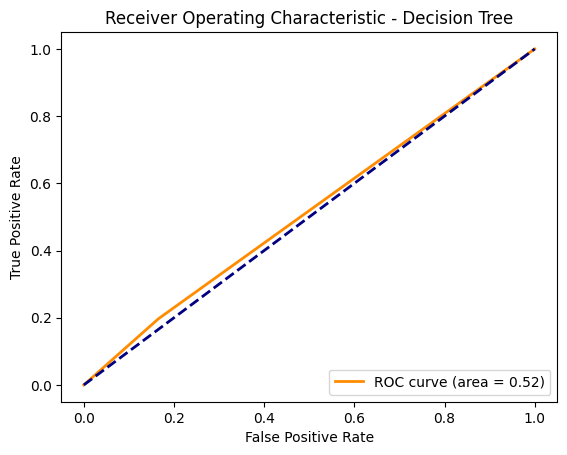

In [57]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
evaluate_model(decision_tree, X_test, y_test, "Decision Tree")# както грустно


Neural Network (MLPClassifier)
Accuracy: 0.9813
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.00      0.00      0.00        66

    accuracy                           0.98      3642
   macro avg       0.49      0.50      0.50      3642
weighted avg       0.96      0.98      0.97      3642



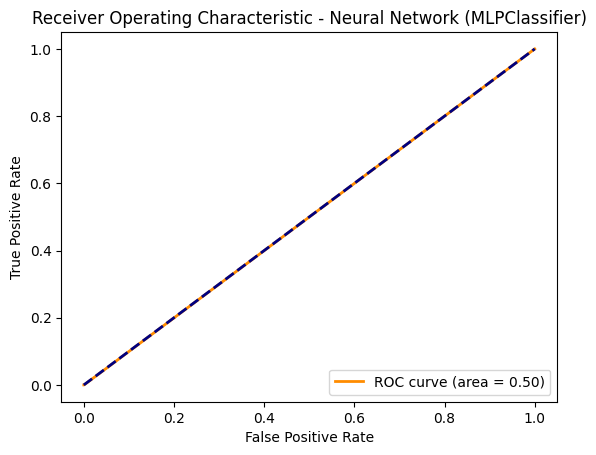

In [71]:
mlp = MLPClassifier(random_state=10000, max_iter=100)
mlp.fit(X_train, y_train)
evaluate_model(mlp, X_test, y_test, "Neural Network (MLPClassifier)") # ну тут в + непалучилось больше 55 никак

пытаемся настроить модельку и протестить 


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
X_train = df1.drop('target', axis=1)
y_train = df1['target']
X_test = df2.drop('target', axis=1)
y_test = df2['target']
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Количество деревьев
    'max_depth': [10, 20, None],  # Глубина деревьев
    'min_samples_split': [2, 5, 10],  # Минимум для разделения узла
    'min_samples_leaf': [1, 2, 4],  # Минимум для образцов в листьях
    'max_features': ['auto', 'sqrt', 'log2'],  # Количество признаков для разделения
    'bootstrap': [True, False]  # Использование бутстрэппинга
}

# Настройка модели с GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Лучшая модель
best_rf_model = grid_search_rf.best_estimator_

# Оценка модели
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


KeyboardInterrupt: 